# Аналитика в авиакомпании

## Постановка задачи

Нам была поставлена задача изучить в первом приближении инфорамцию о наиболее популярных городах и моделях самолётов.

Для этого нам необходимо:
- выбрать топ-10 городов по количеству рейсов;
- построить графики: модели самолетов и количество рейсов, города и количество рейсов, топ-10 городов и количество рейсов;
- сделать выводы по каждому из графиков, пояснить результат;

Данные необходимо интерпритировать и постараться найти какие-либо инсайты.

## Ознакомление с данными, предобработка

Сначала импортируем необходимые библиотеки, а также создадим датафреймы с датасетами.

In [1]:
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt

models = pd.read_csv('/datasets/query_1.csv')
city = pd.read_csv('/datasets/query_3.csv')

Рассмотрим основную информацию для каждого датафрейма.

In [2]:
def brief(data, head=5):
    '''Функция быстрого просмотра датафрейма
    '''
    data.info()
    display(data.head(head))
    print('Количество дубликатов - {}'.format(data.duplicated().sum()))

In [3]:
brief(models, 8)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


Количество дубликатов - 0


По моделям самолётов датасет очень маленький, пропусков нет. В части типов данных можно провести корректировку на тип данных - целочисленный.

In [4]:
models['flights_amount'] =models['flights_amount'].astype(int)

In [5]:
brief(city, 5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613


Количество дубликатов - 0


С городами ситуация та же, за исключением типов данных: среднее количество полётов в формате float - то, что нужно.

###### Вывод

Предварительный обзор данных показал, что пропуски в датасетах отсуствуют, типы данных соответствуют необходимым, проблем с SQL-выгрузками не обнаружили.

<strong> В связи с этим не требуется дополнительная обработка данных

## Анализ данных

Выведем топ-10 городов по количеству полетов за день.

In [6]:
display(city.sort_values(by='average_flights', ascending=False).head(10).reset_index(drop=True))

,city,average_flights
0,Москва,129.774194
1,Санкт-Петербург,31.161290
2,Новосибирск,17.322581
3,Красноярск,11.580645
4,Екатеринбург,11.322581
5,Ростов-на-Дону,10.193548
6,Пермь,10.129032
7,Брянск,10.000000
8,Сочи,9.612903
9,Ульяновск,9.580645


In [7]:
def draw_hist(df_hist,title, xlabel, ylabel="Объем, ед."
                 , h_range=None, size=(10,7), bins=10, dpi=160, color = 'green'):
    '''Печатает красивую гистограмму.
    
    Позволяет сократить объемы текста, выводя красивую гистограмму одной строчкой'''
    plt.figure(figsize=size, dpi=dpi)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.grid()
    plt.hist(df_hist,bins=bins, range=h_range, color=color)
    plt.show()
    plt.close()

def draw_bar(x,y, title, xlabel = 'Объем, ед.',ylabel='', size=(10,7), dpi=160, color='blue',
            horizontal='False'):
    plt.figure(figsize=size, dpi=dpi)
    plt.xlabel(xlabel)
    if ylabel != '':
        plt.ylabel(ylabel)
    plt.title(title)
    plt.grid()
    if horizontal == True:
        plt.barh(x,y, color=color)
    else:
        plt.bar(x,y, color=color)
    plt.show()
    plt.close()

Далее рассмотрим гистограмму по моделям самолетов и количеству рейсов. 

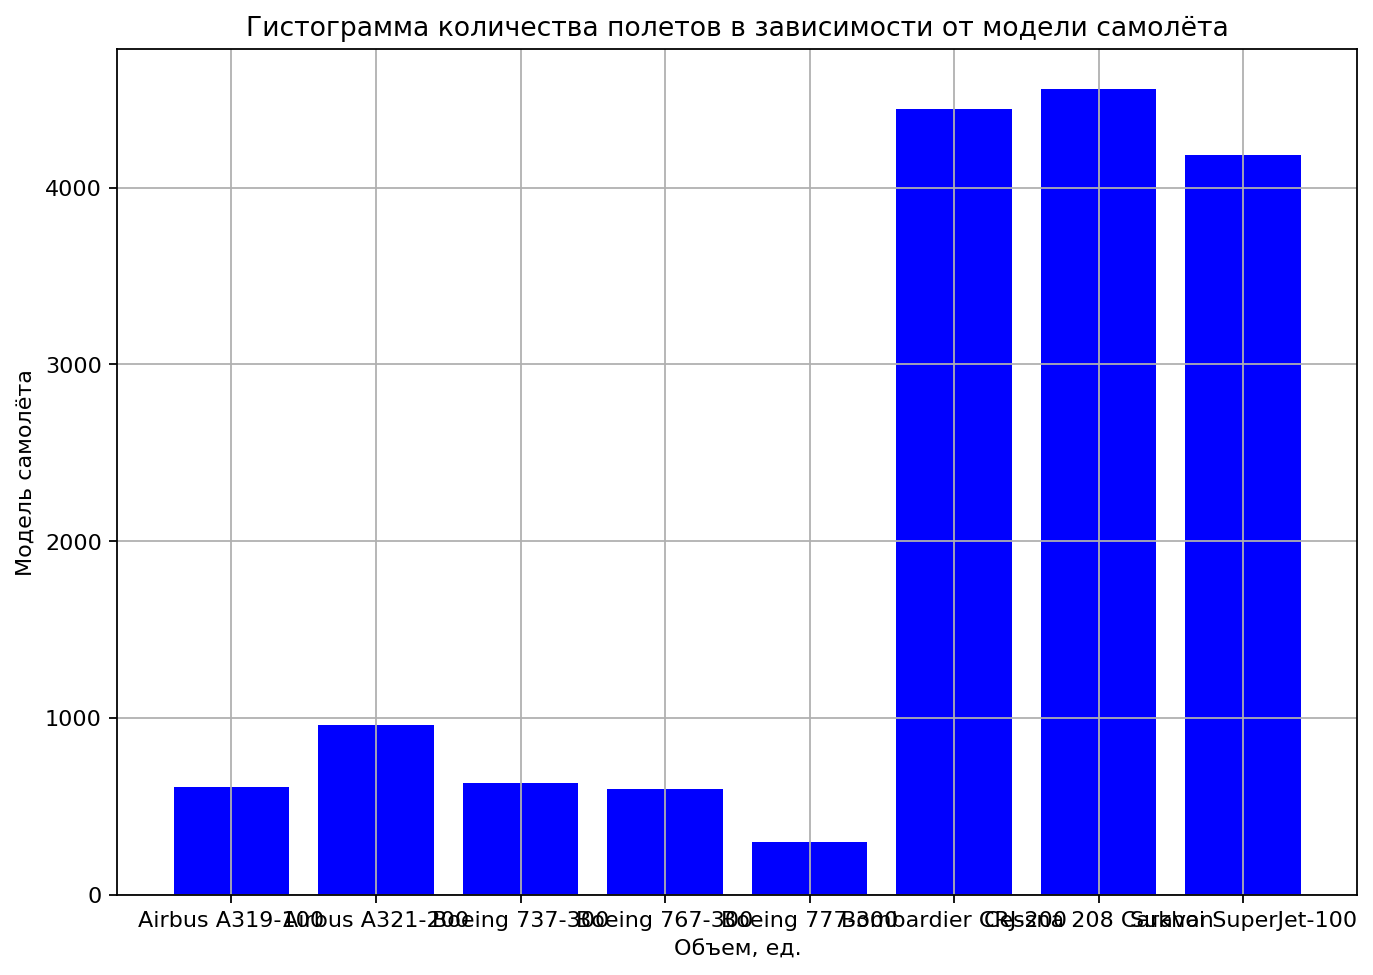

In [8]:
draw_bar(models['model'], models['flights_amount'], title='Гистограмма количества полетов в зависимости от модели самолёта',
        ylabel='Модель самолёта')

Наиболее количество полётов наблюдается у Bombardier CRJ-200, Cessna 208 Caravan, Sukhoi Superjet-100. Скорее всего это вызвано состоянием авиапарка компании, который состоит преимущественно из указанных ранее моделей. Поэтому судить о эффективности использования, загруженности и прочем мы не можем. Просто констатируем данный факт.

Далее посмотрим на распределение количества полетов в день по городам. 

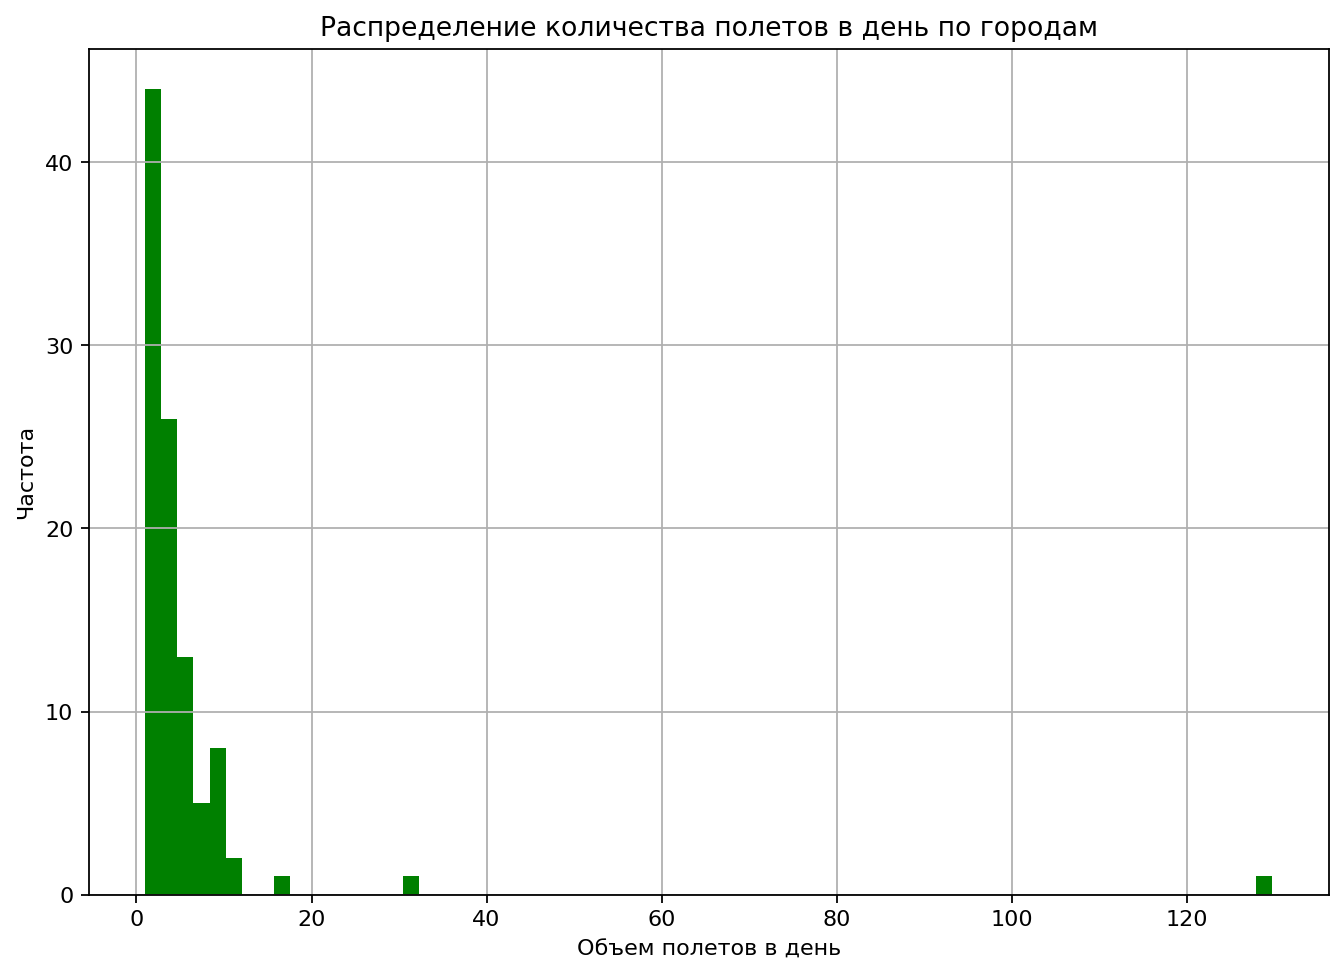

In [9]:
draw_hist(city['average_flights'], title='Распределение количества полетов в день по городам', xlabel='Объем полетов в день',
          ylabel='Частота', bins=70)

Посмотрим поближе на распределение при помощи метода describe().

In [10]:
city['average_flights'].describe()

count    101.000000
mean       5.494189
std       13.119790
min        1.000000
25%        2.000000
50%        3.000000
75%        5.870968
max      129.774194
Name: average_flights, dtype: float64

75 перцентиль имеет значение в 5,87, а медиана - 3. Получается, что пассажиропоток в большинство городов, куда летают самолеты компании F9, не велик. Лишь немногие из городов принимают большое количество самолетов и пассажиров соответственно.

Для начала рассмотрим полную картину по городам.

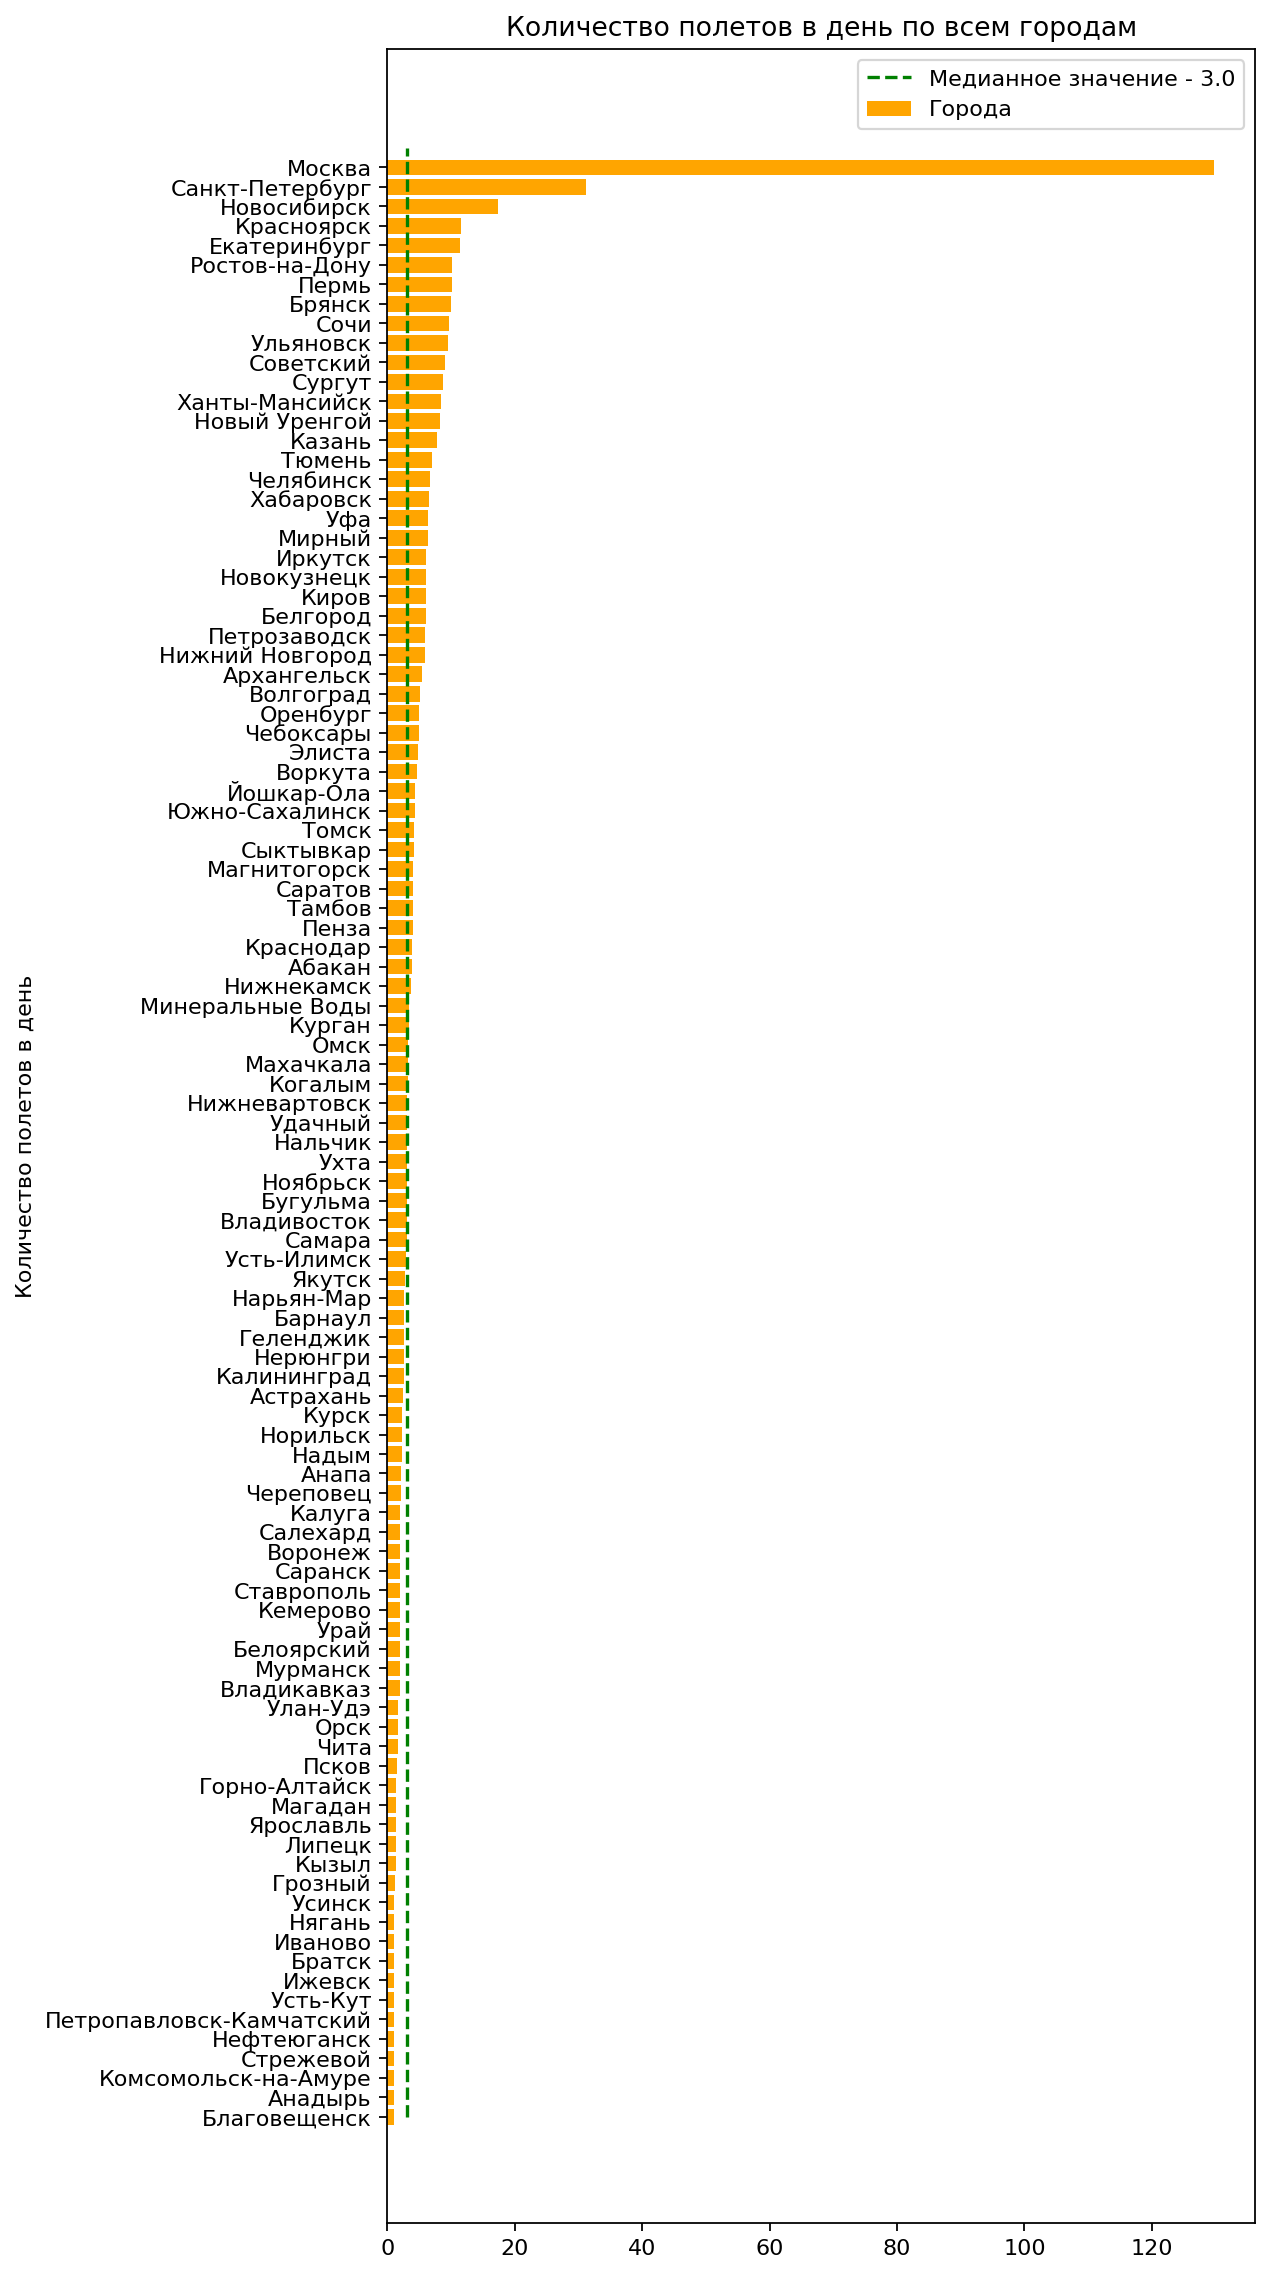

In [11]:
city = city.sort_values(by='average_flights', ascending=True)

median = "Медианное значение - " + str(round(city['average_flights'].median(),2))

plt.figure(figsize=(7,18), dpi=160)
plt.xticks(rotation=0)
plt.ylabel('Количество полетов в день')
plt.title('Количество полетов в день по всем городам')
plt.barh(city['city'], city['average_flights'], color='orange', label='Города')
plt.plot([city['average_flights'].median(),city['average_flights'].median()], [0, 101], "k--", color='green',
         label=median)
plt.legend()
plt.show()
plt.close()

Теперь посмотрим количество полетов в рамках топ-10 городов по данному показателю.

In [12]:
city10= city.nlargest(10,'average_flights')

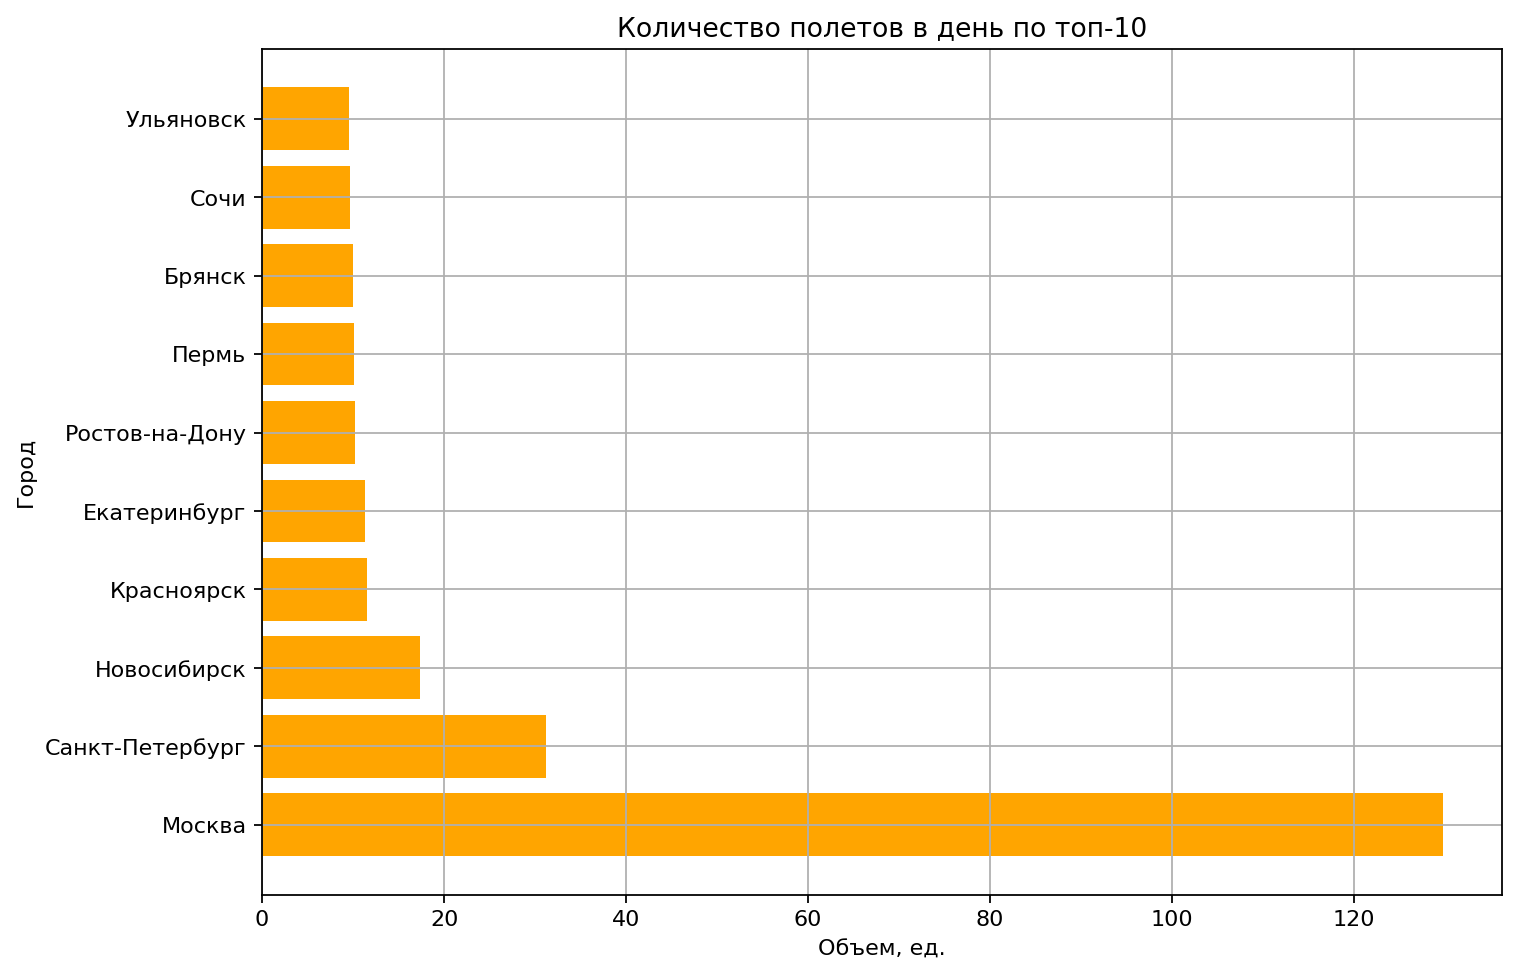

In [13]:
draw_bar(city10['city'], city10['average_flights'], title='Количество полетов в день по топ-10',
        ylabel='Город', color='orange', horizontal=True)

Москва, ожидаемо, занимает топ-1. Также понятно, почему Петербург занимает топ-2 - культурная столица, самый европейский город России. Новосибирск - главный город Сибири. 

В остальном, указанные в топ-10 города просто являются одними из наиболее крупных или привлекательных к посещений.

###### Вывод

В данном разделе мы рассмотрели оба датафрейма. К сожалению, объем информации в датасетах невелик, из-за чего рассмотреть различные зависимости и найти какие-либо инсайты не удалось. 

## Вывод

Данной работой мы рассмотрели 2 датасета, изучили информацию по моделям самолётов, а также городам. 

Мы обнаружили, что:
- В компании F9 наиболее большинство полетов совершается без использования самолетов моделей Airbus или Boeing из-за состава авиапарка.
- Наибольшее количество полетов осуществляется из Москвы, Петербурга и Новосибирска; при чём Москва имеет львиную долю перелетов. Скорее всего это вызвано тем, что данные города можно рассматривать с двух аспектов. Первый аспект заключается в том, что это региональные центры - зачастую осуществить прямой перелет из одного маленького города в другой невозможно, для этого требуется прилететь в крупный город, где есть возможность попасть в другой малый город. С другой стороны Россия - всё ещё централизованная страна, где основные экономические, политические и социальные процессы осуществляются вокруг небольшого числа крупных городов.